# **Project 2**
Seung Min Song, Krutika Patel<br>

03/05/2024

1. Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
2. Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
3. What can you infer about each of the distinct groups?

# **Research Question**

* Examine how are job titles related to specific industries and salaries.
* Use projection to identify key patterns and relationships within the job market, highlighting how specific roles align with industry sectors and salary ranges.
* Calculate degree centrality and between centrality.

# **Data Source**

* https://www.kaggle.com/datasets/andrewmvd/data-scientist-jobs

# **Data Set**

In [ ]:

import pandas as pd

# Load dataset

ds = pd.read_csv('https://raw.githubusercontent.com/seung-m1nsong/620/main/Project2/DataScientist.csv')

ds.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


# **Data Wrangling**

* Drop first columns in the  dataframe
* Remove rows where Industry column is "-1"

In [ ]:
#ds = ds.drop(ds.columns[0], axis=1)
ds = ds[ds['Industry'] != "-1" ]
ds.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1
5,5,5,Data Scientist,$111K-$181K (Glassdoor est.),Job Brief\n\nThe ideal candidate will have pre...,2.9,IFG Companies\n2.9,"New York, NY","Hartford, CT",201 to 500 employees,1985,Company - Private,Insurance Carriers,Insurance,Unknown / Non-Applicable,"Colony Specialty, Markel, RLI",-1


In [ ]:
ds['Salary Estimate'] = ds['Salary Estimate'].apply(lambda x: x.replace(' (Glassdoor est.)', ''))
ds.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K,"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
3,3,3,Data Analyst,$111K-$181K,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K,"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1
5,5,5,Data Scientist,$111K-$181K,Job Brief\n\nThe ideal candidate will have pre...,2.9,IFG Companies\n2.9,"New York, NY","Hartford, CT",201 to 500 employees,1985,Company - Private,Insurance Carriers,Insurance,Unknown / Non-Applicable,"Colony Specialty, Markel, RLI",-1


Filter New York, NY

In [ ]:
ds_df = ds[['Job Title', 'Salary Estimate', 'Location', 'Industry']].copy()
ds_df = ds_df.loc[ds_df['Location'] == 'New York, NY'].copy()

ds_df.head()

,Job Title,Salary Estimate,Location,Industry
0,Senior Data Scientist,$111K-$181K,"New York, NY",Travel Agencies
1,"Data Scientist, Product Analytics",$111K-$181K,"New York, NY","Health, Beauty, & Fitness"
4,"Director, Data Science",$111K-$181K,"New York, NY",Advertising & Marketing
5,Data Scientist,$111K-$181K,"New York, NY",Insurance Carriers
6,Quantitative Researcher,$111K-$181K,"New York, NY",Investment Banking & Asset Management


Get information about the filtered DataFrame

In [ ]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 330
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        256 non-null    object
 1   Salary Estimate  256 non-null    object
 2   Location         256 non-null    object
 3   Industry         256 non-null    object
dtypes: object(4)
memory usage: 10.0+ KB


## **Create data frame**

* Job Title & Salary Estimate
  * Job Title & Salary Estimate information shows which occupation falls into which salary range.
* Job Title & Industry
  * Job Title & Industry information shows which occupations and industries are most likely to be employed.



In [ ]:
# Create a data frame containing only the 'Job Title' and 'Salary Estimate' columns
ds_job_salary_df = ds_df[['Job Title', 'Salary Estimate']].copy()

# Create a data frame containing only the ‘Job Title’ and ‘Location’ columns.
ds_job_industry_df = ds_df[['Job Title', 'Industry']].copy()

# result
print("Job Title & Salary Estimate:")
print(ds_job_salary_df.head())
print("\nJob Title & Industry:")
print(ds_job_industry_df.head())

Job Title & Salary Estimate:
                           Job Title Salary Estimate
0              Senior Data Scientist     $111K-$181K
1  Data Scientist, Product Analytics     $111K-$181K
4             Director, Data Science     $111K-$181K
5                     Data Scientist     $111K-$181K
6            Quantitative Researcher     $111K-$181K

Job Title & Industry:
                           Job Title                               Industry
0              Senior Data Scientist                        Travel Agencies
1  Data Scientist, Product Analytics              Health, Beauty, & Fitness
4             Director, Data Science                Advertising & Marketing
5                     Data Scientist                     Insurance Carriers
6            Quantitative Researcher  Investment Banking & Asset Management


Create a network with Job Title + Salary

In [ ]:
nt = pd.DataFrame({'Source': ds_job_salary_df['Job Title'], 'Target': ds_job_salary_df['Salary Estimate']})
print(nt.head())

                              Source       Target
0              Senior Data Scientist  $111K-$181K
1  Data Scientist, Product Analytics  $111K-$181K
4             Director, Data Science  $111K-$181K
5                     Data Scientist  $111K-$181K
6            Quantitative Researcher  $111K-$181K


## **Projection**

**Job + Salary**

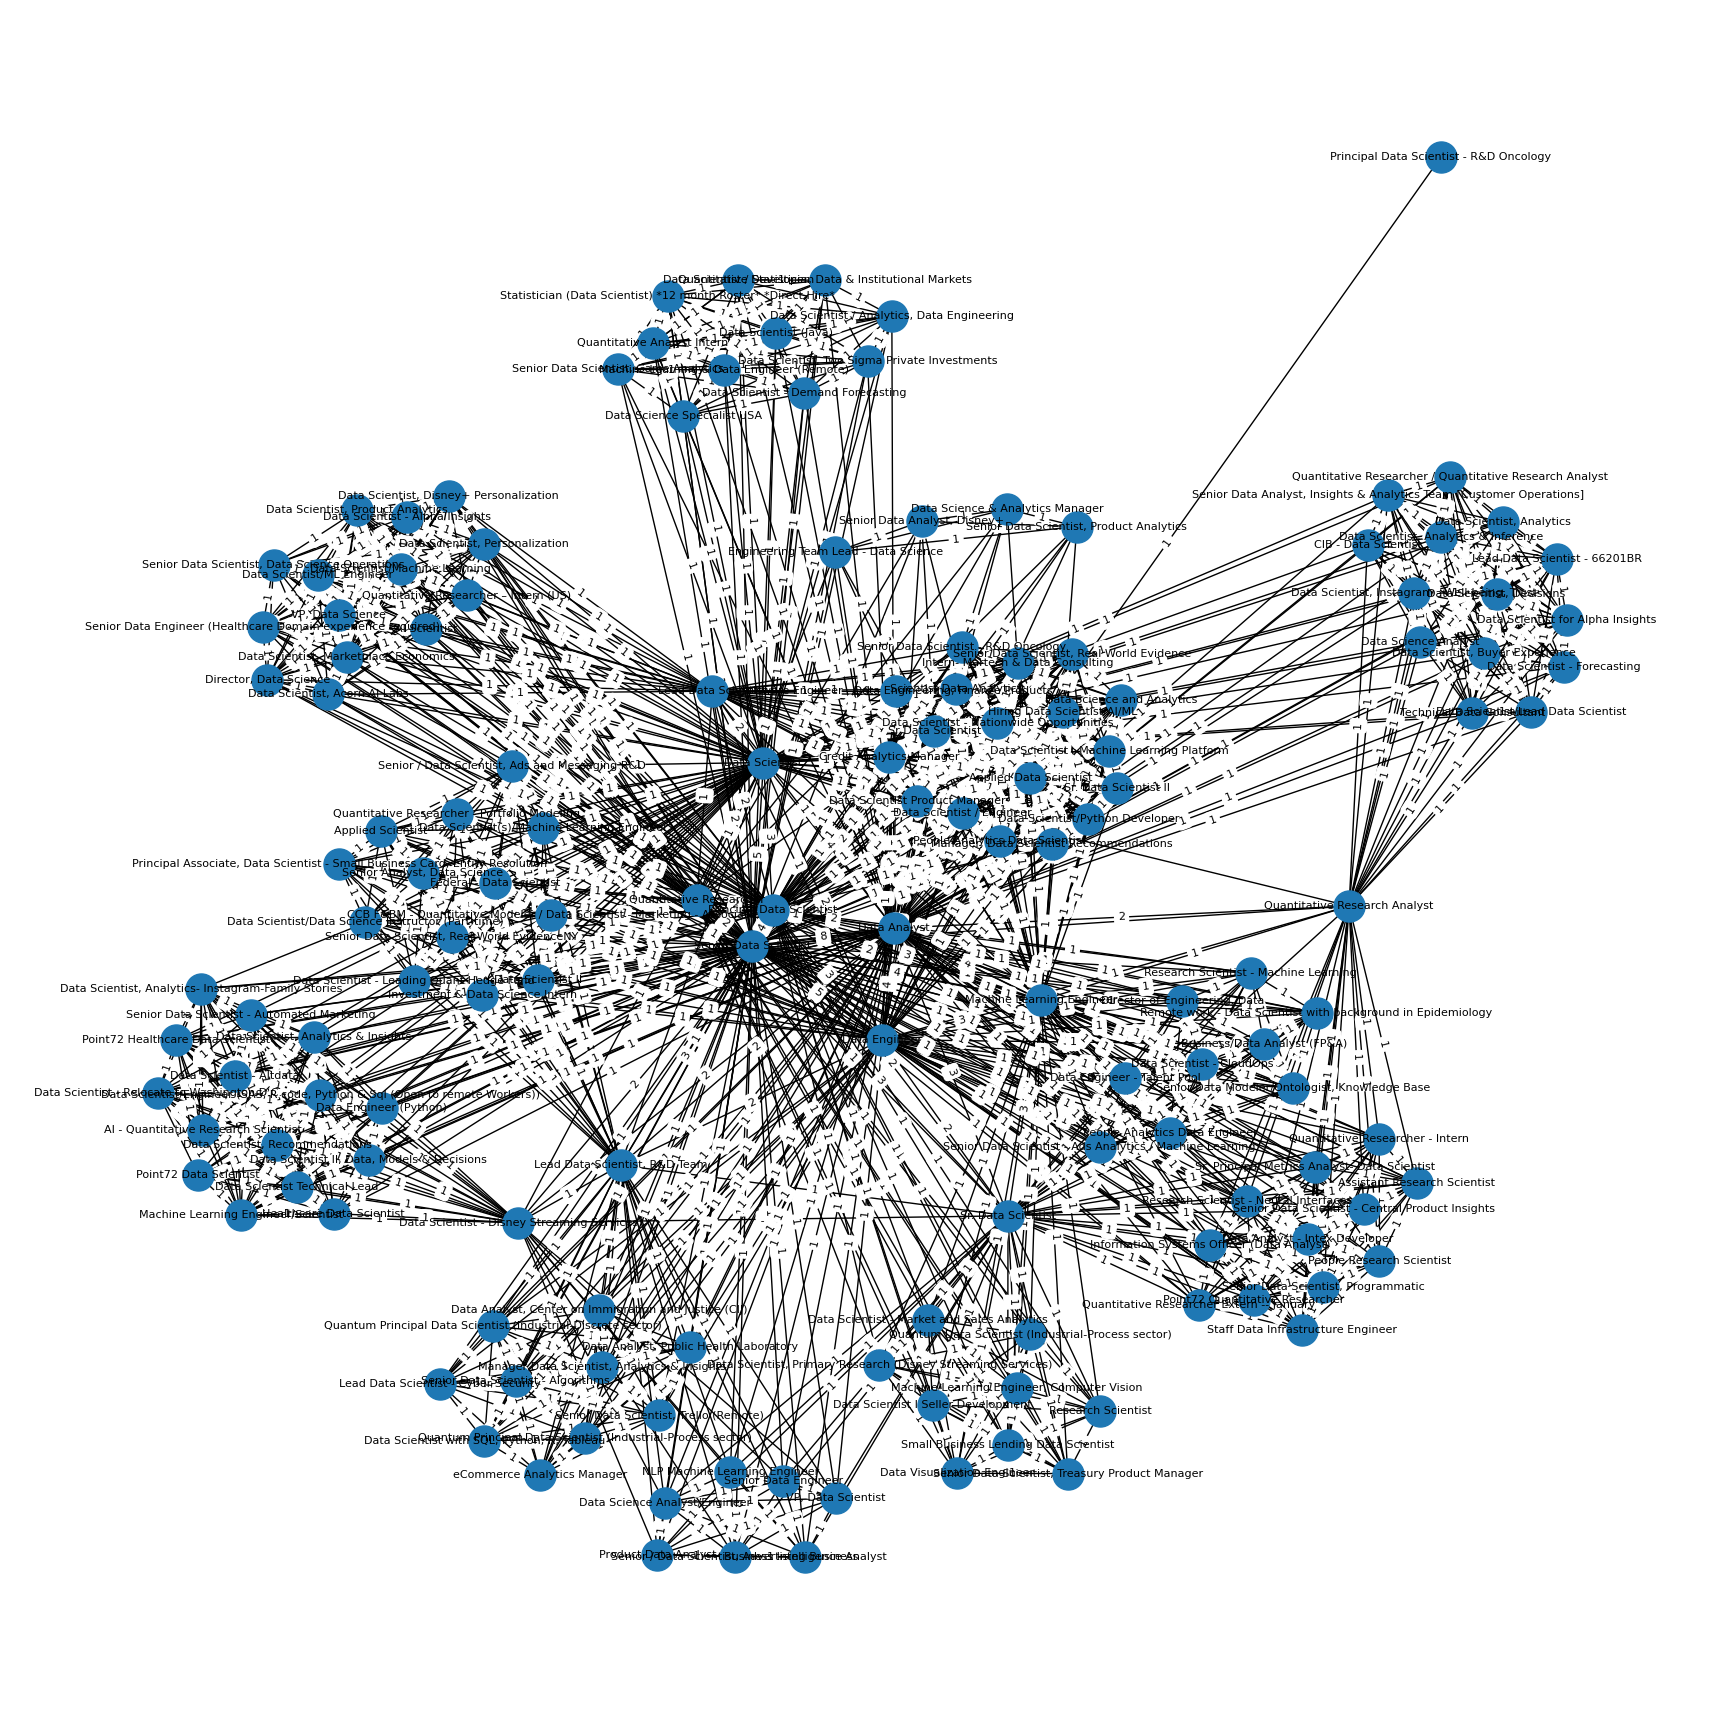

In [ ]:
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite


B = nx.Graph()
B.add_nodes_from(nt['Source'], bipartite=0)
B.add_nodes_from(nt['Target'], bipartite=1)


for index, row in nt.iterrows():
    B.add_edge(row['Source'], row['Target'])

job_nodes = {n for n, d in B.nodes(data=True) if d['bipartite'] == 0}
G = bipartite.weighted_projected_graph(B, job_nodes)

import matplotlib.pyplot as plt

plt.figure(figsize=(22, 22))

pos = nx.spring_layout(G)


nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=8)

edge_weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, font_size=8)

plt.axis('off')
plt.show()


### Island Method to reduce the size of the network

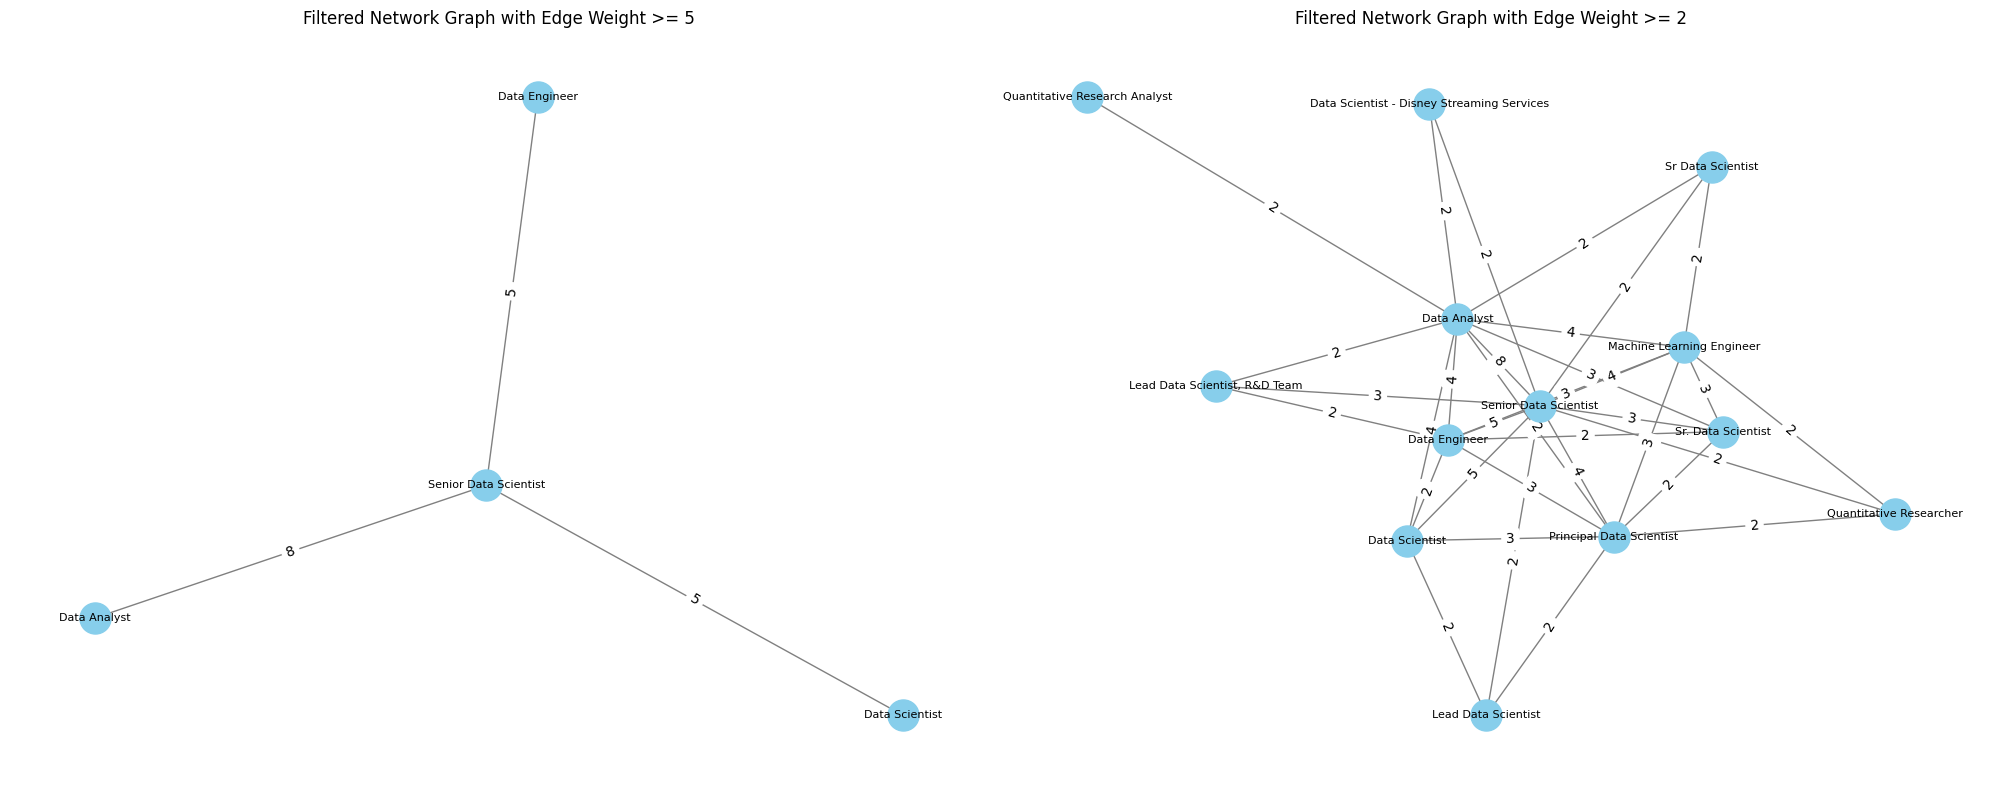

In [ ]:
thresholds = [5, 2]

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

for i, threshold in enumerate(thresholds):
    G_thresholded = nx.Graph()
    for u, v, weight in G.edges(data=True):
        if weight['weight'] >= threshold:
            G_thresholded.add_node(u)
            G_thresholded.add_node(v)
            G_thresholded.add_edge(u, v, weight=weight['weight'])

    pos = nx.spring_layout(G_thresholded)

    nx.draw_networkx_nodes(G_thresholded, pos, ax=axs[i], node_color='skyblue', node_size=500)

    nx.draw_networkx_edges(G_thresholded, pos, ax=axs[i], edge_color='gray')

    nx.draw_networkx_labels(G_thresholded, pos, ax=axs[i], font_size=8, font_family='sans-serif')

    edge_labels = nx.get_edge_attributes(G_thresholded, 'weight')
    nx.draw_networkx_edge_labels(G_thresholded, pos, ax=axs[i], edge_labels=edge_labels)

    axs[i].set_title(f'Filtered Network Graph with Edge Weight >= {threshold}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

## **Degree Centrality**

**Job + Salary**

In [ ]:
# Compute the degree centrality of G: deg_cen
deg_cen = nx.degree_centrality(G)
sorted_deg_cen=sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)

top_10_degree = sorted_deg_cen[:10]
bottom_10_degree = sorted_deg_cen[-10:]

print("Top 10 nodes by degree centrality:")
for node, value in top_10_degree:
    print(f"{node}: {value}")

#print("\nBottom 10 nodes by eigenvector centrality:")
#for node, value in bottom_10_degree:
#    print(f"{node}: {value}")

Top 10 nodes by degree centrality:
Senior Data Scientist: 0.8378378378378379
Data Analyst: 0.7567567567567568
Data Scientist: 0.6418918918918919
Principal Data Scientist: 0.4864864864864865
Data Engineer: 0.47972972972972977
Machine Learning Engineer: 0.41216216216216217
Sr. Data Scientist: 0.31081081081081086
Lead Data Scientist: 0.26351351351351354
Lead Data Scientist, R&D Team: 0.25
Quantitative Researcher: 0.2364864864864865


## **Between Centrality**

In [ ]:
bet_cen = nx.betweenness_centrality(G)
sorted_bet_cen = sorted(bet_cen.items(), key=lambda x: x[1], reverse=True)

top_10_degree = sorted_bet_cen[:10]

print("Top 10 nodes by between centrality:")
for node, value in top_10_degree:
    print(f"{node}: {value}")

Top 10 nodes by between centrality:
Senior Data Scientist: 0.2599856275876684
Data Analyst: 0.23429309832371073
Data Scientist: 0.15794602911949834
Principal Data Scientist: 0.07329843018618527
Data Engineer: 0.050042625042625036
Machine Learning Engineer: 0.046843835874448125
Sr. Data Scientist: 0.03523631559345844
Quantitative Researcher: 0.022711644140215554
Lead Data Scientist, R&D Team: 0.01428484999913571
Quantitative Research Analyst: 0.01245735531449817


Create a network with Job Title +Industy

In [ ]:
nt2 = pd.DataFrame({'source': ds_job_industry_df['Job Title'], 'target': ds_job_industry_df['Industry']})
print(nt2.head())

                              source                                 target
0              Senior Data Scientist                        Travel Agencies
1  Data Scientist, Product Analytics              Health, Beauty, & Fitness
4             Director, Data Science                Advertising & Marketing
5                     Data Scientist                     Insurance Carriers
6            Quantitative Researcher  Investment Banking & Asset Management


## **Projection**

**Job + Industry**

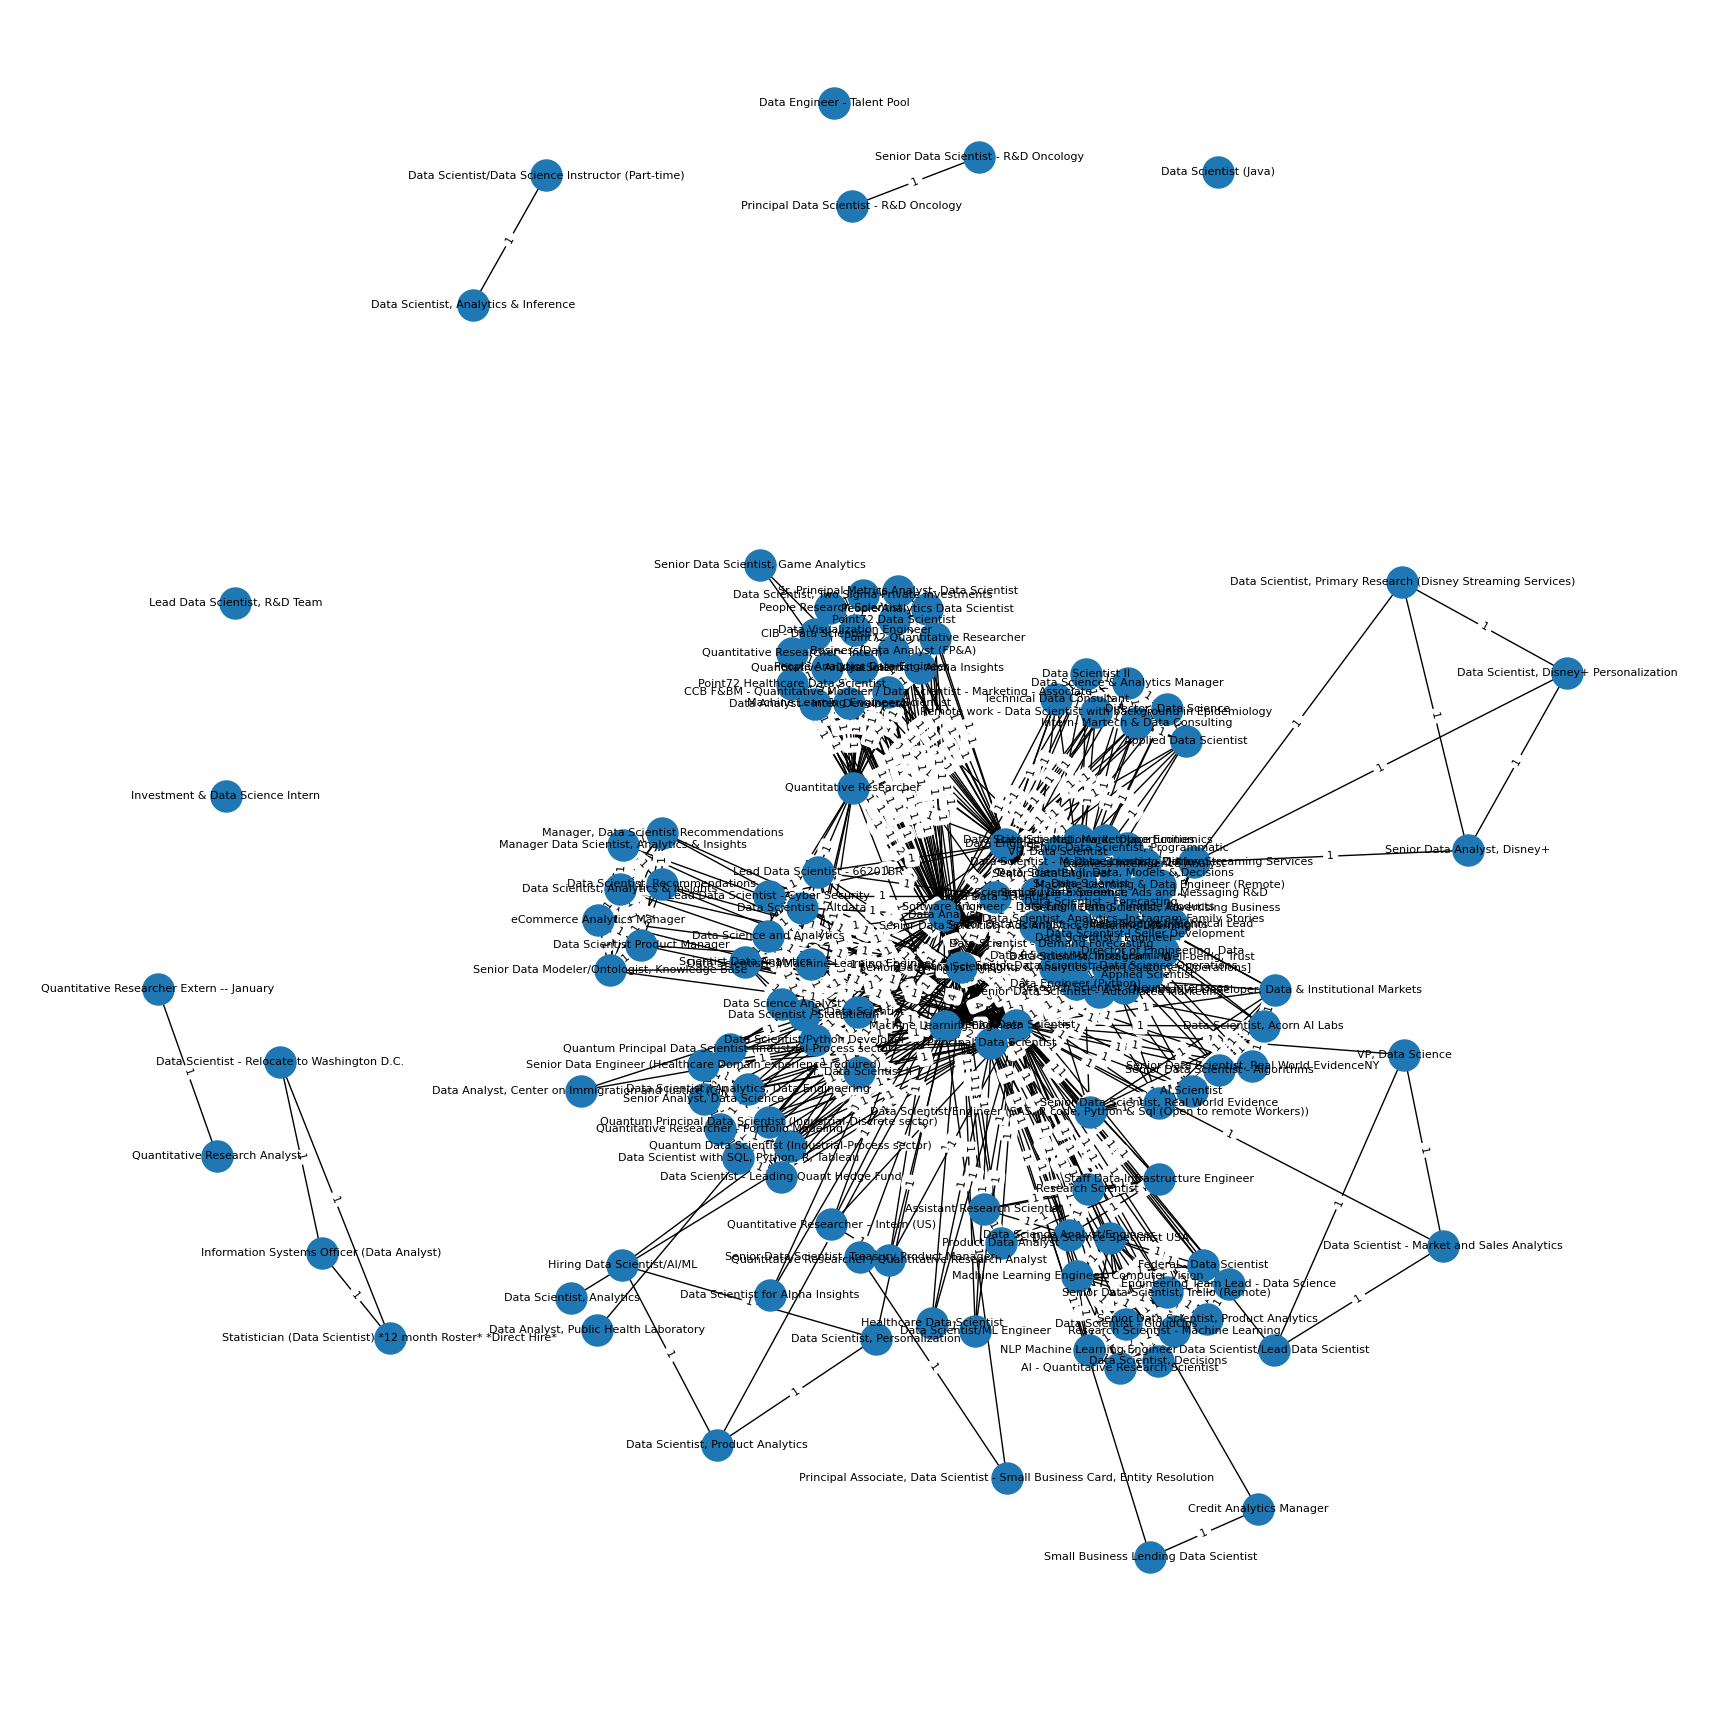

In [ ]:
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

B = nx.Graph()
B.add_nodes_from(nt2['source'], bipartite=0)
B.add_nodes_from(nt2['target'], bipartite=1)


for index, row in nt2.iterrows():
    B.add_edge(row['source'], row['target'])

job_nodes2 = {n for n, d in B.nodes(data=True) if d['bipartite'] == 0}
G2 = bipartite.weighted_projected_graph(B, job_nodes2)


plt.figure(figsize=(22, 22))

pos = nx.spring_layout(G2, k=0.4, iterations=50)

nx.draw_networkx_nodes(G2, pos, node_size=500)
nx.draw_networkx_edges(G2, pos)
nx.draw_networkx_labels(G2, pos, font_size=8)

edge_weights = nx.get_edge_attributes(G2, 'weight')
nx.draw_networkx_edge_labels(G2, pos, edge_labels=edge_weights, font_size=8)

plt.axis('off')
plt.show()


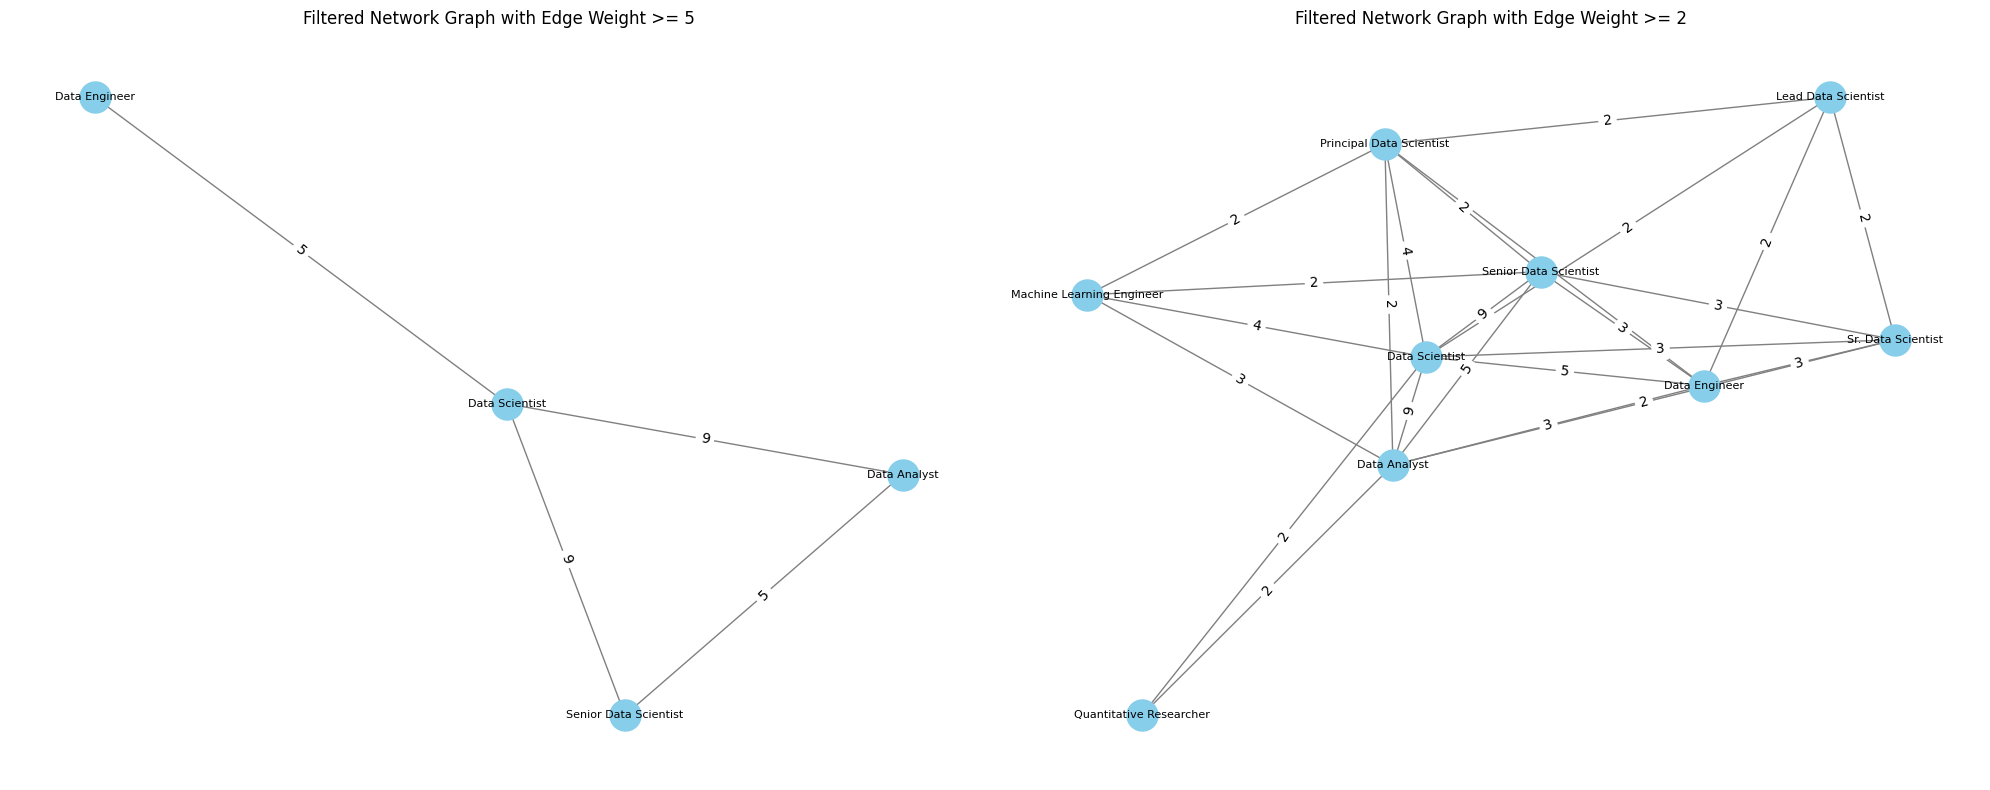

In [ ]:
thresholds = [5, 2]

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

for i, threshold in enumerate(thresholds):
    G2_thresholded = nx.Graph()
    for u, v, weight in G2.edges(data=True):
        if weight['weight'] >= threshold:
            G2_thresholded.add_node(u)
            G2_thresholded.add_node(v)
            G2_thresholded.add_edge(u, v, weight=weight['weight'])

    pos = nx.spring_layout(G2_thresholded)

    nx.draw_networkx_nodes(G2_thresholded, pos, ax=axs[i], node_color='skyblue', node_size=500)

    nx.draw_networkx_edges(G2_thresholded, pos, ax=axs[i], edge_color='gray')

    nx.draw_networkx_labels(G2_thresholded, pos, ax=axs[i], font_size=8, font_family='sans-serif')

    edge_labels = nx.get_edge_attributes(G2_thresholded, 'weight')
    nx.draw_networkx_edge_labels(G2_thresholded, pos, ax=axs[i], edge_labels=edge_labels)

    axs[i].set_title(f'Filtered Network Graph with Edge Weight >= {threshold}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

## **Degree Centrality**
**Job + Industry**

In [ ]:
# Compute the degree centrality of G: deg_cen
deg_cen = nx.degree_centrality(G2)
sorted_deg_cen=sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)

top_10_degree = sorted_deg_cen[:10]
bottom_10_degree = sorted_deg_cen[-10:]

print("Top 10 nodes by degree centrality:")
for node, value in top_10_degree:
    print(f"{node}: {value}")

#print("\nBottom 10 nodes by eigenvector centrality:")
#for node, value in bottom_10_degree:
#    print(f"{node}: {value}")

Top 10 nodes by degree centrality:
Data Scientist: 0.8040540540540541
Senior Data Scientist: 0.6081081081081081
Data Analyst: 0.5878378378378378
Data Engineer: 0.5067567567567568
Machine Learning Engineer: 0.40540540540540543
Principal Data Scientist: 0.3783783783783784
Sr. Data Scientist: 0.3581081081081081
Lead Data Scientist: 0.2972972972972973
Data Scientist - Disney Streaming Services: 0.27702702702702703
Applied Scientist: 0.2567567567567568


## **Between Centrality**

In [ ]:
bet_cen = nx.betweenness_centrality(G2)
sorted_bet_cen = sorted(bet_cen.items(), key=lambda x: x[1], reverse=True)

top_10_degree = sorted_bet_cen[:10]

print("Top 10 nodes by between centrality:")
for node, value in top_10_degree:
    print(f"{node}: {value}")

Top 10 nodes by between centrality:
Data Scientist: 0.27930685787828635
Senior Data Scientist: 0.16252681252681242
Data Analyst: 0.10475730832873677
Machine Learning Engineer: 0.08043298400441262
Data Engineer: 0.06242109456395169
Principal Data Scientist: 0.04503738432309861
Data Scientist - Disney Streaming Services: 0.03640375068946498
Sr. Data Scientist: 0.020716124287552835
Lead Data Scientist: 0.011215296929582645
Quantitative Researcher: 0.007533553962125391
